In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/Lenovo/kntu/btc-eth-prices-outliers.csv.txt",index_col=0,parse_dates=True)
data.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bitcoin  365 non-null    float64
 1   Ether    362 non-null    float64
dtypes: float64(2)
memory usage: 8.6 KB


In [4]:
data[data["Ether"].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [5]:
data["Ether"].fillna(method="ffill",inplace=True)

In [6]:
data[data["Ether"].isna()]

,Bitcoin,Ether
Timestamp,,


In [7]:
data.iloc[251]

Bitcoin    15142.834152
Ether        421.150000
Name: 2017-12-09 00:00:00, dtype: float64

In [8]:
data.iloc[249]

Bitcoin    16501.971667
Ether        421.150000
Name: 2017-12-07 00:00:00, dtype: float64

In [9]:
data.iloc[253]

Bitcoin    16762.116667
Ether        513.290000
Name: 2017-12-11 00:00:00, dtype: float64

In [10]:
data.iloc[252]

Bitcoin    14869.805
Ether        421.150
Name: 2017-12-10 00:00:00, dtype: float64

In [11]:
data

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


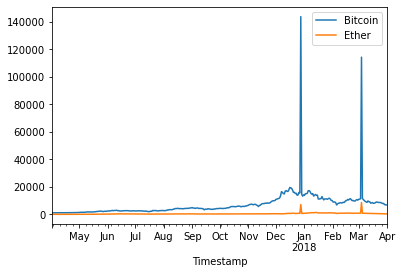

In [12]:
data.plot()
plt.show()

In [13]:
data_btc=data.drop(columns="Ether")

In [14]:
data_ether=data.drop(columns="Bitcoin")

In [15]:
data_btc.head()

,Bitcoin
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


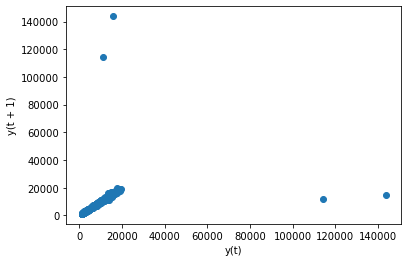

In [16]:
from pandas.plotting import lag_plot
lag_plot(data_btc)
plt.show()

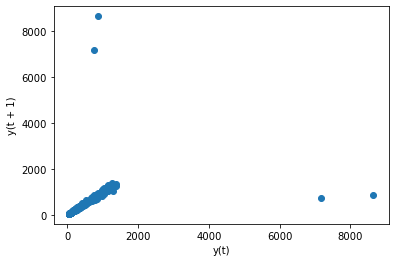

In [17]:
from pandas.plotting import lag_plot
lag_plot(data_ether)
plt.show()

In [18]:
data_btc.values

array([[  1099.169125  ],
       [  1141.813     ],
       [  1141.6003625 ],
       [  1133.07931429],
       [  1196.3079375 ],
       [  1190.45425   ],
       [  1181.1498375 ],
       [  1208.8005    ],
       [  1207.744875  ],
       [  1226.6170375 ],
       [  1218.92205   ],
       [  1180.0237125 ],
       [  1185.26005714],
       [  1184.88067143],
       [  1186.9274125 ],
       [  1205.634875  ],
       [  1216.18674286],
       [  1217.9300875 ],
       [  1241.686325  ],
       [  1258.3614125 ],
       [  1261.311225  ],
       [  1257.9881125 ],
       [  1262.902775  ],
       [  1279.4146875 ],
       [  1309.109875  ],
       [  1345.3539125 ],
       [  1331.29442857],
       [  1334.9790375 ],
       [  1353.0045    ],
       [  1417.1728125 ],
       [  1452.0762875 ],
       [  1507.57685714],
       [  1508.292125  ],
       [  1533.33507143],
       [  1560.4102    ],
       [  1535.86842857],
       [  1640.619225  ],
       [  1721.28497143],
       [  17

In [19]:
values=pd.DataFrame(data_btc.values)

In [20]:
values

,0
0,1099.169125
1,1141.813000
2,1141.600363
3,1133.079314
4,1196.307937
...,...
360,7960.380000
361,7172.280000
362,6882.531667
363,6935.480000


In [21]:
dataframe=pd.concat([values.shift(1),values],axis=1)
dataframe.columns=["t-1","t+1"]

In [22]:
dataframe

,t-1,t+1
0,NaN,1099.169125
1,1099.169125,1141.813000
2,1141.813000,1141.600363
3,1141.600363,1133.079314
4,1133.079314,1196.307937
...,...,...
360,7876.195000,7960.380000
361,7960.380000,7172.280000
362,7172.280000,6882.531667
363,6882.531667,6935.480000


In [23]:
dataframe.corr()

,t-1,t+1
t-1,1.00000,0.28001
t+1,0.28001,1.00000


In [24]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
x=data_btc.values
train , test =x[1:len(x)-7] , x[len(x)-7:len(x)]
model=AutoReg(train,lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 1.46936321e+03  6.89396362e-02  5.69020344e-02  4.77827302e-02
  3.89021202e-02  5.08105631e-02  4.51192844e-02  4.97017056e-02
  5.50799105e-02  6.38735390e-02  5.94450730e-02  5.50483025e-02
  5.56580008e-02  4.49938282e-02  2.90228919e-02  3.51542986e-02
  3.87643838e-02  3.16973047e-02  1.98072250e-02  5.76145647e-03
  1.15391185e-02  1.31161797e-02 -4.49460231e-04  2.56465678e-03
 -9.86709980e-03 -1.64290680e-02 -1.19435828e-02 -1.37098760e-02
 -5.62913942e-03 -8.68216072e-04]


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [25]:
test

array([[8197.54833333],
       [7876.195     ],
       [7960.38      ],
       [7172.28      ],
       [6882.53166667],
       [6935.48      ],
       [6794.105     ]])

In [26]:
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
predictions

array([8488.94037968, 8738.43656768, 7441.89832487, 6650.29347122,
       6960.05747761, 6710.2051407 , 7491.72540075])

In [27]:
for i in range(len(predictions)):
    print("predictions=%f    , expected=%f" %(predictions[i],test[i]))

predictions=8488.940380    , expected=8197.548333
predictions=8738.436568    , expected=7876.195000
predictions=7441.898325    , expected=7960.380000
predictions=6650.293471    , expected=7172.280000
predictions=6960.057478    , expected=6882.531667
predictions=6710.205141    , expected=6935.480000
predictions=7491.725401    , expected=6794.105000


In [28]:
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 522.781


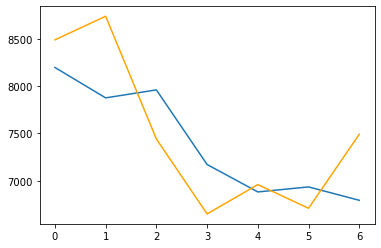

In [29]:
plt.plot(test)
plt.plot(predictions, color='orange')
plt.show()